In [1]:
HTML_MODE = False
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート2025年版
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()

# 国内ゲームハード週販レポート (2025-11-09) [[LAB MODE]]

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

Switch2の販売台数9万台。いよいよ年末商戦シフトです。
この先、週平均10万だと年内に70万台積み増して累計330万台を超えます。
クリスマスシーズンに向けてさらに増量されそうですから、ここから年内100万台もあるかもしれません。

Switchはド安定です。Switch2が売れてもあまり減らないんですよね。

PS5は今週も7千台で低迷。しかし希望はあります...

In [5]:
def chart_4weeks() -> None:
    df1 = hs.load_hard_sales()
    # 4 weeks before
    before_4weeks = hs.current_report_date(df1) - Timedelta(weeks=4-1)
    (out1, style1) = ch.chart_units_by_date_hw(df1, begin=before_4weeks)
    display(style1)
    
chart_4weeks()

### PS5 DE（日本語版）値下げ!

先週、 **(PS5には)超ビッグなセールが必要** と書きましたが、
ついにPS5DE日本限定版による値下げが発表されました。
値下げ版は11月21日からなので、次々回の集計から反映されます。
次回の集計は買い控えのが大きく現れるでしょう。5000台を切る可能性もあります。

PS5 DEは不人気モデルで、今週の販売台数はわずか777台です。縁起がいいのか悪いのか。

* PS5／4254台（累計584万5837台）
* PS5 デジタル・エディション／777台（累計102万4306台）
* PS5 Pro／2660台（累計26万6752台）

値下げ後には通常版からDEに売れ筋がシフトするのが期待値ですが、
物理パッケージが売れない機種をメインで販売する小売の方のお気持ちはいかがなものか。

#### 値下げの効果は？

今年のPS5のセール期の週販は2万〜3万台です。
ただしセールと異なり期間限定の値下げではないので急いで買う需要はないでしょう。
また「日本語版」の影響を知るまで待つ人もいるでしょう。
そのため、値下げ初週は2万5千台、その後は1万5千程度でしばらく推移すると予想します。
1万5千でも現状の倍ですからね。

それはそれとして、SIEの目前の必達目標である「2020年のPS最低記録」を超えるのは確実と思われます。

In [14]:
df = hs.load_hard_sales()
df = hs.pivot_yearly_sales(df, begin=datetime(2020,1,1), hw=['PS4', 'PS5'])
df['PS合計'] = df.sum(axis=1)
# index値が2020のPS合計カラムと index値が2025のPS合計カラムの差を計算
sum2020 = df.loc[2020, 'PS合計']
sum2025 = df.loc[2025, 'PS合計']
diff = sum2020 - sum2025 + 1
display(Markdown(f"### 現時点の年間PS販売台数 {sum2025:,}台、2020年の記録{sum2020:,}台を超えるまで、あと{diff:,}台 (約{diff // 7:,}台/週) !!"))

### 現時点の年間PS販売台数 718,871台、2020年の記録797,797台を超えるまで、あと78,927台 (約11,275台/週) !!

## 2025年の週販推移

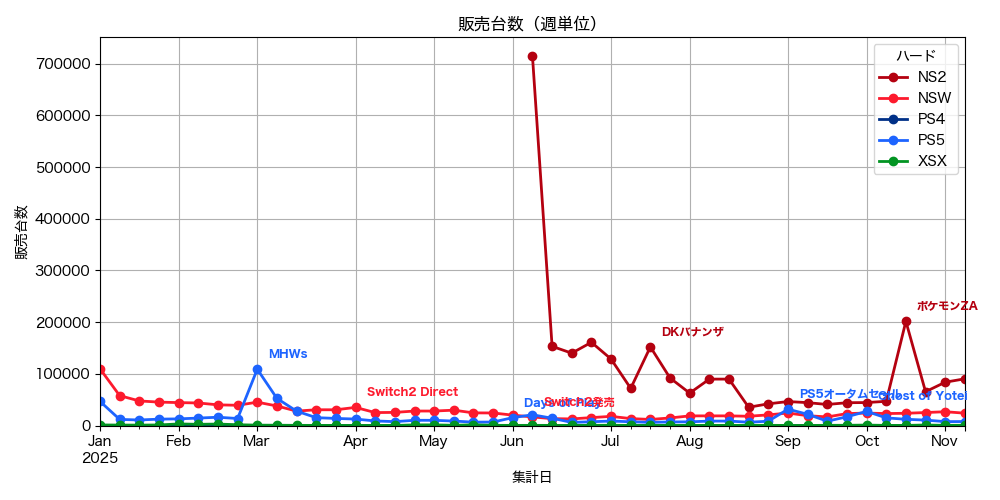

In [8]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), event_mask = report_event_mask)

### 2025年の週販推移(拡大）

注目点はSwitch2の年末商戦モードがどこまで上がっていくか。よもや、ここまで来ての失速は無いでしょう。

PS5については11月23日集計以降のPS5 DE(日本語版)の動きが興味深いですね。

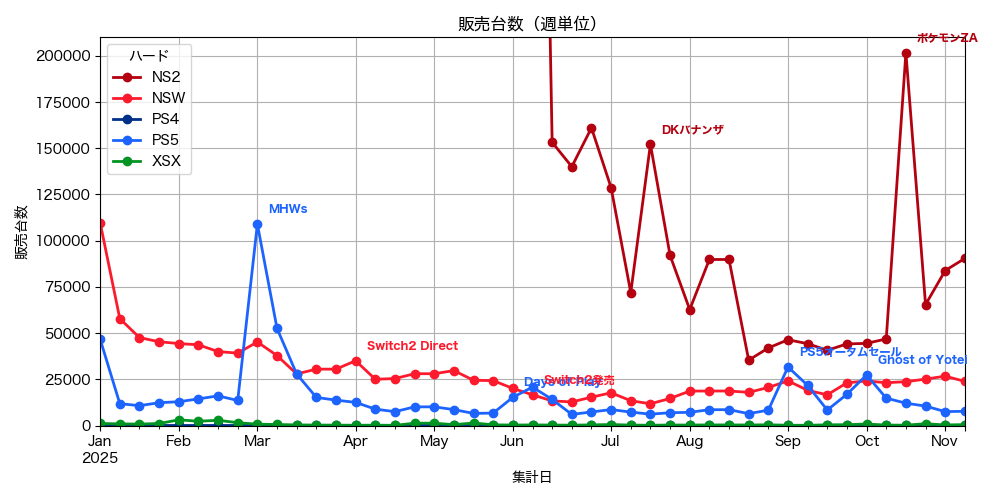

In [9]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), ymax=210000, event_mask=report_event_mask)

## 2025年の月間販売推移

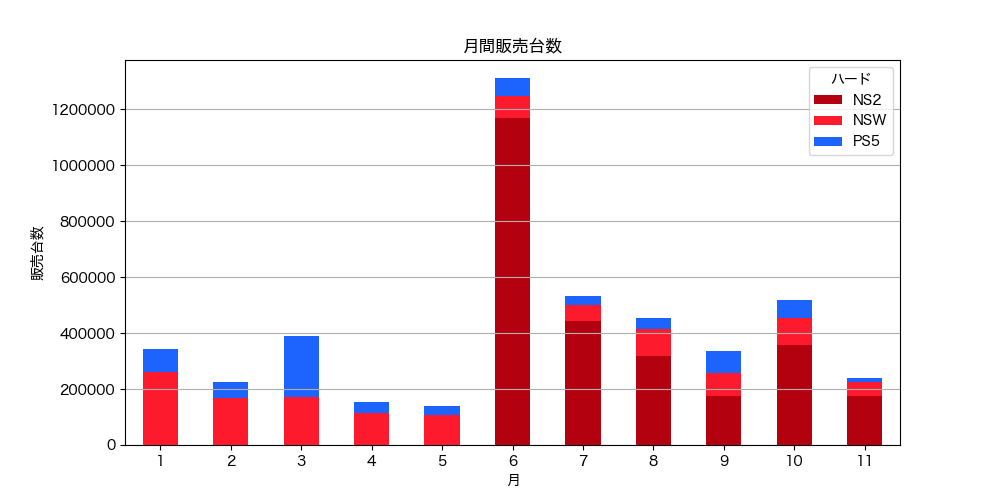

In [17]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW"], year=2025, stacked=True)

Switch2の年末商戦モードの出荷が始まったので、11月に40万以上、50万台行けるかもしません。
エアライダー対応での集中出荷があれば、さらに上回るかも。

In [18]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}'})
display(df)

hw,NS2,NSW,PS5
month,,,
1,0,"260,447","81,587"
2,0,"167,188","56,886"
3,0,"171,921","218,300"
4,0,"113,513","38,983"
5,0,"106,506","32,001"
6,"1,169,684","78,097","63,516"
7,"444,706","57,532","28,959"
8,"319,690","94,517","39,004"
9,"175,542","82,946","78,693"


### Nintendo Switchの月間販売台数： 2023,2024年との比較

Switch2大量出荷にも関わらずSwitchの販売台数は安定しています。
11月の販売台数は10月と同等か若干上回る程度と思われます。


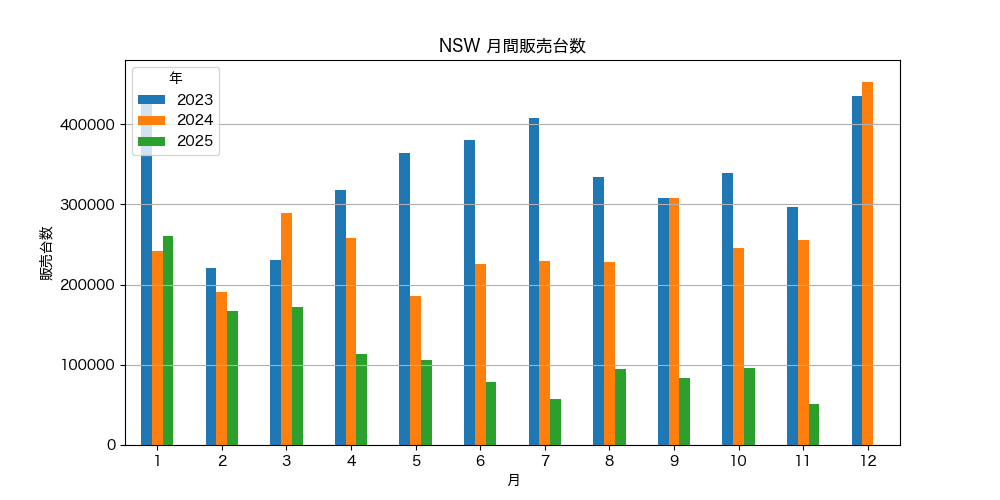

In [19]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=datetime(2023,1,1), end=datetime(2025,11,30))

### PlayStation 5の月間販売台数： 2023, 2024年との比較

11月21日のDE値下げまでは辛抱です。その後の跳ね上がりに期待しましょう。


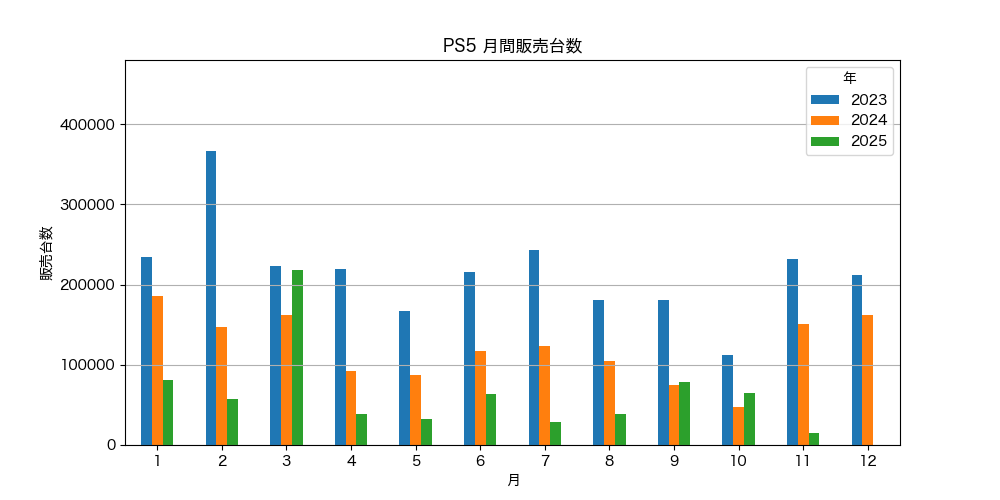

In [20]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=datetime(2023,1,1), end=datetime(2025,11,30))

## 累計販売推移

Switch2 の右端が微妙に上がってまいりました。

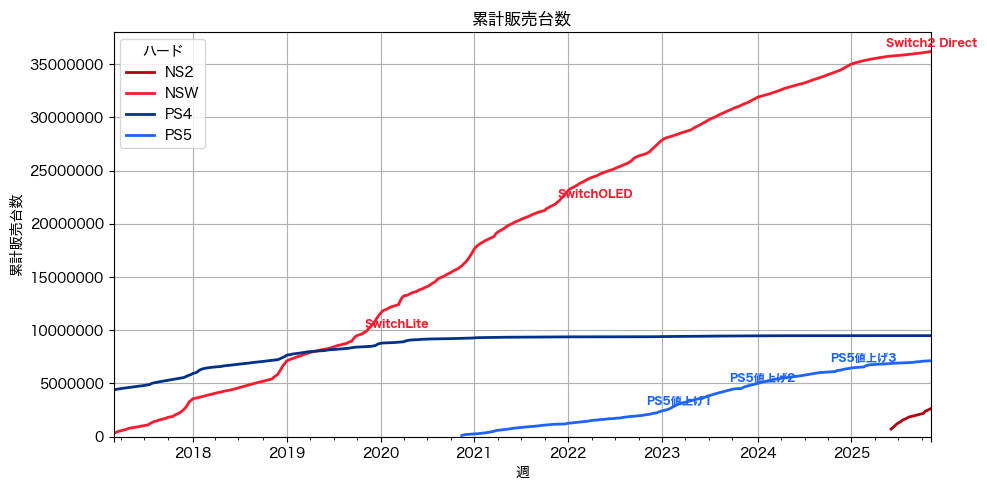

In [16]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)


### PS5とSwitch2の累計推移

PS5とSwitch2だけの累計グラフです。Switch2の急伸が分かり易くなっています。

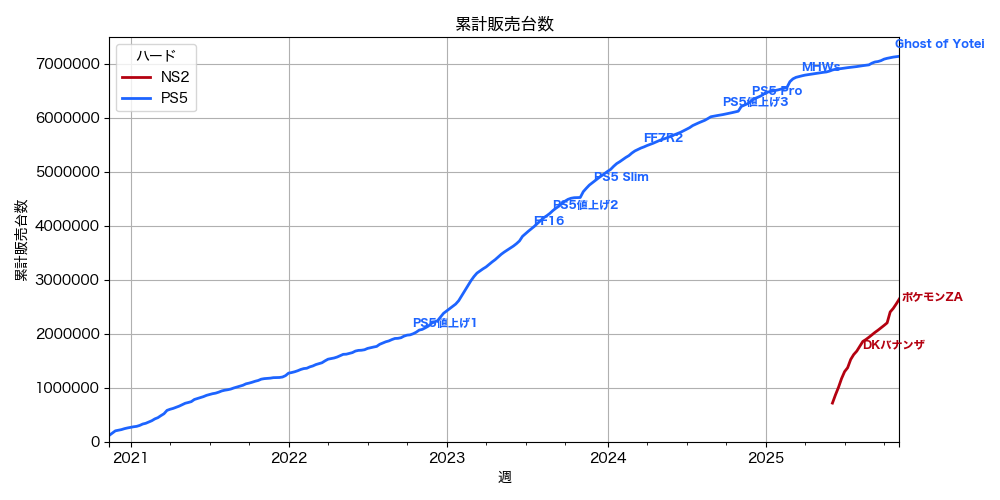

In [24]:
middle_range_event_mask = he.EventMasks(hard=1.5, soft=2, event=1, price=1, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['NS2', 'PS5'], begin=datetime(2020,11,10), event_mask = middle_range_event_mask)


## Switch2販売状況

### 歴代機種との比較

ZA発売週の20万台がグラフの傾きにハッキリと現れています。
今後、初動歴代2位から3位に落ちる可能性はなさそうですが、
今のペースで歴代1位を超えるのは困難でしょう。

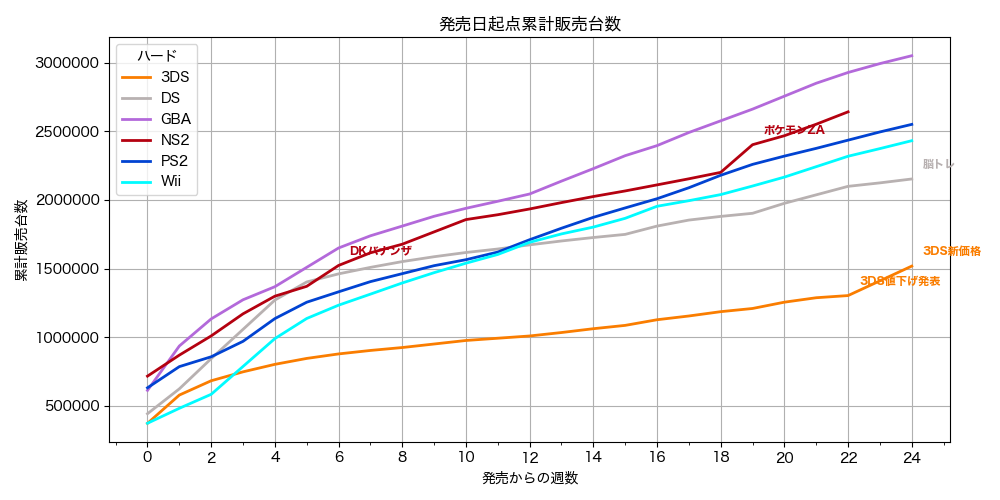

In [26]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS"], 
                                        mode="week", xgrid=2, end=24,
                                        event_mask=report_event_mask)

In [27]:
df12 = df.iloc[df.index == 22]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

,週数,販売数
ハード,,
GBA,22,"2,929,059"
NS2,22,"2,642,256"
PS2,22,"2,435,785"
Wii,22,"2,318,432"
DS,22,"2,099,048"
3DS,22,"1,302,804"


## Switch/Switch2ロンチ比較

Switch2は年末商戦モードに入り10万台近辺の推移が続くでしょう。
Switchとのロンチ比較もそろそろ不要かもしれませんね。

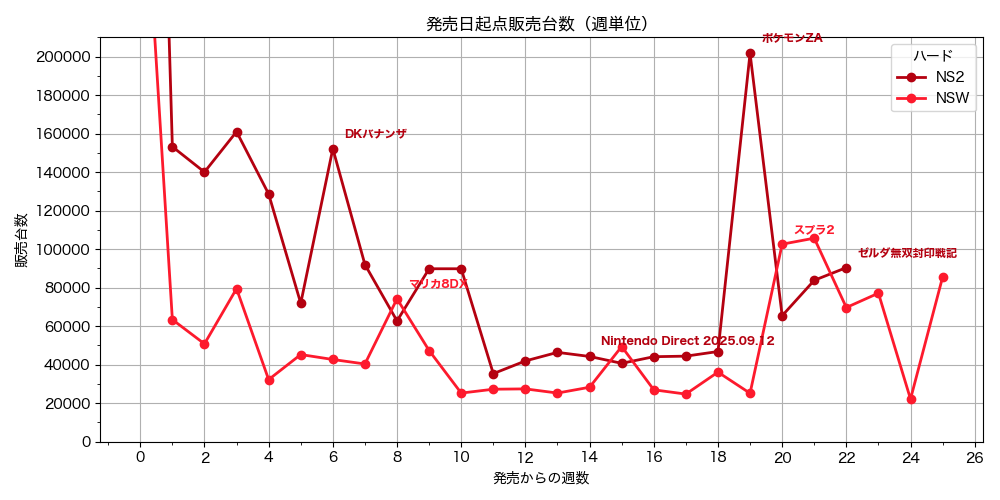

In [28]:
switch_event_mask = he.EventMasks(hard=5, event=2, soft=3, price=0, sale=0)
(fig, df) = ph.plot_sales_by_delta(hw=["NSW", "NS2"], 
                                   end=25, ymax=210000, xgrid=2, ygrid=20000, mode="week", 
                                   event_mask=switch_event_mask)


## 年単位の状況

全機種合わせた年毎のハード販売の状況です。

2025年の販売台数が464万台に到達し、2024年の457万台を超えました。
年内に550万台に届く可能性があります。


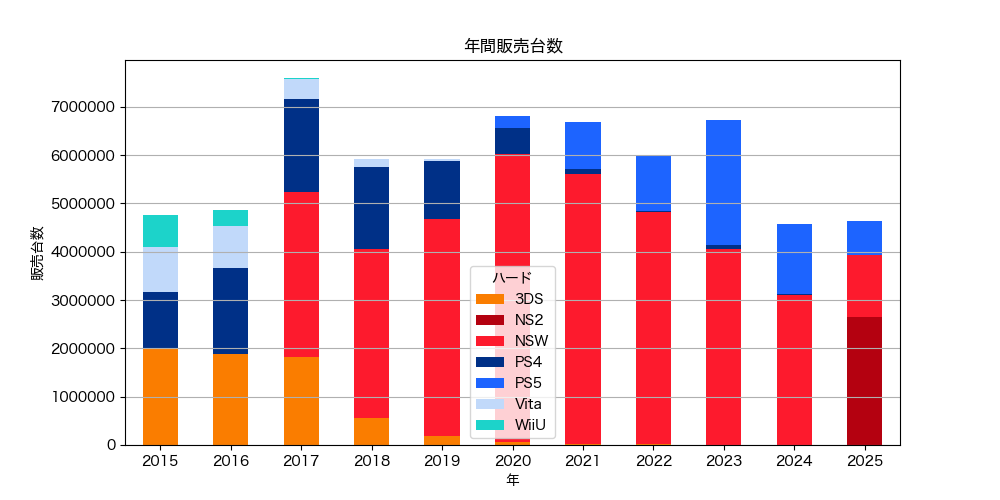

In [7]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita'], 
                                       begin=datetime(2015,1,1), 
                                       end=datetime(2025,12,31), stacked=True)

### 年単位のメーカーシェア

2025年の任天堂のシェアが上がってきました。2020年の水準まで到達できるかどうか。

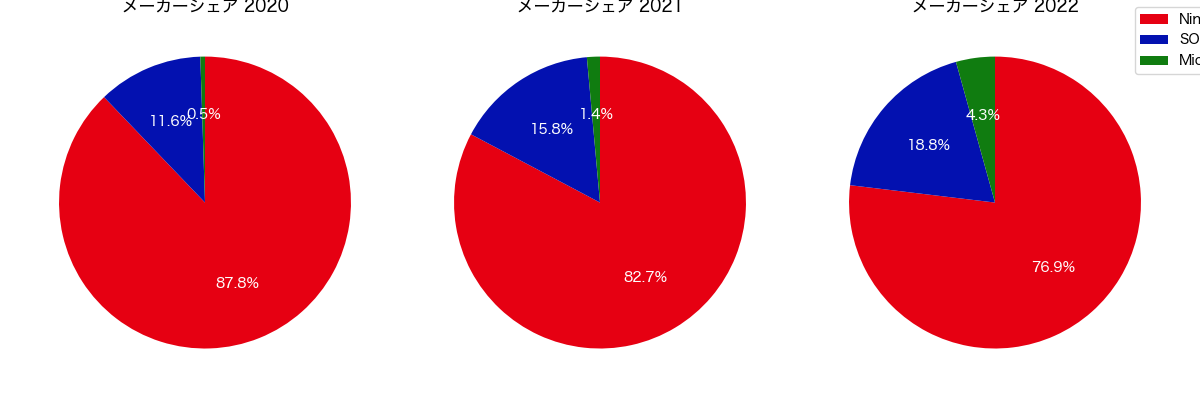

In [29]:
(fig, df) = ph.plot_maker_share_pie(begin_year=2020, end_year=2022)

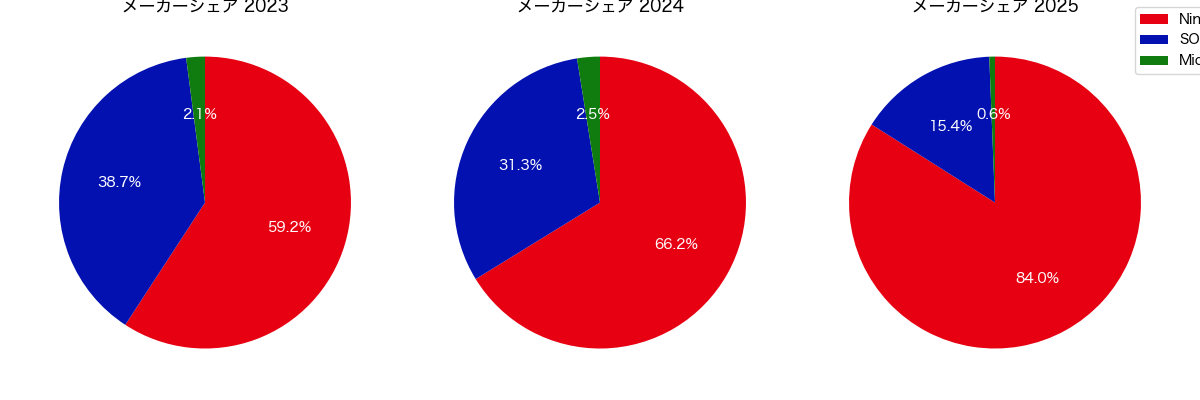

In [30]:
(fig, df) = ph.plot_maker_share_pie(begin_year=2023, end_year=2025)